<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Figure-1:-Linear-model" data-toc-modified-id="Figure-1:-Linear-model-1">Figure 1: Linear model</a></span></li><li><span><a href="#Figure-2:-Geometric-Interpretation-of-SSE" data-toc-modified-id="Figure-2:-Geometric-Interpretation-of-SSE-2">Figure 2: Geometric Interpretation of SSE</a></span></li><li><span><a href="#Figure-3:-TSS,-RSS,-and-$R^2$" data-toc-modified-id="Figure-3:-TSS,-RSS,-and-$R^2$-3">Figure 3: TSS, RSS, and $R^2$</a></span></li><li><span><a href="#Figure-4:-Physical-System-Interpretation" data-toc-modified-id="Figure-4:-Physical-System-Interpretation-4">Figure 4: Physical System Interpretation</a></span></li></ul></div>

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Figure 1: Linear model

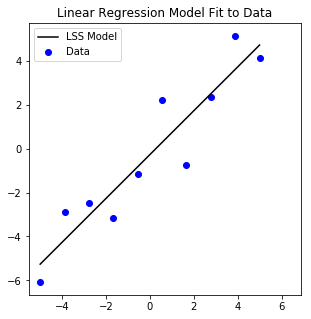

In [27]:
import numpy as np
from scipy import stats
from matplotlib import patches

# Generate Dataset
np.random.seed(123)
x = np.linspace(-5, 5, 10)
y = np.random.randn(*x.shape) + x

# Find LSS solution
beta_1, beta_0, correlation_coefficient, _, _ = stats.linregress(x, y)

def linear_model_function(x):
    return beta_0 + beta_1 * x


## Plotting
DATA_COLOR = 'blue'
MODEL_COLOR = 'black'


def plot_data_and_linear_model():    
    plt.scatter(x, y, color=DATA_COLOR, marker='o', label='Data')
    plt.plot(x, linear_model_function(x), color=MODEL_COLOR, label='LSS Model')
    standardize_axis()


def standardize_axis():
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])
    plt.axis('square')
    plt.legend()
    

# Plot Data and LSS Model Fit
plt.subplots(figsize=(5, 5))
plot_data_and_linear_model()
plt.title('Linear Regression Model Fit to Data');
plt.savefig('/tmp/linear-regression-lss-solution.png', bbox_inches='tight', dpi=300)

## Figure 2: Geometric Interpretation of SSE

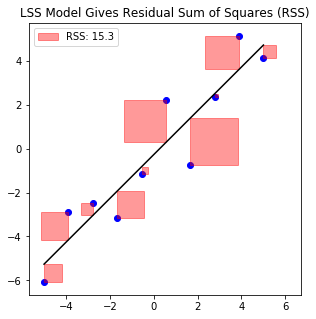

In [31]:
lss_loss = RSS = round(sum((y - linear_model_function(x))**2), 1)

# Plotting
LINEAR_MODEL_ERROR_COLOR = 'red'
def plot_prediction_loss(x, y, prediction, color, label):
    error = y - prediction
    error_sign = np.sign(error)
    if error_sign > 0:
        bottom_left = (x - error, prediction)
    elif error_sign <= 0:
        bottom_left = (x, y)
    
    # error squared patch
    rect = patches.Rectangle(
        bottom_left,
        abs(error), abs(error),
        linewidth=1,
        edgecolor=color,
        facecolor=color,
        alpha=.4,
        label=label
    )

    # Add the patch to the Axes
    plt.gca().add_patch(rect)
    return rect


# Plot Least Sum of Squares Solution and RSS
plt.subplots(figsize=(5, 5))
plot_data_and_linear_model()

# Plot the loss contributions as squares
for data in zip(x, y, linear_model_function(x)):
    error_patch = plot_prediction_loss(
        *data, color=LINEAR_MODEL_ERROR_COLOR,
        label=f"RSS: {RSS}"
    )
standardize_axis()
plt.legend(handles=[error_patch])
plt.title("LSS Model Gives Residual Sum of Squares (RSS)")
plt.savefig('/tmp/lss-gives-rss.png', bbox_inches='tight', dpi=300)

## Figure 3: TSS, RSS, and $R^2$

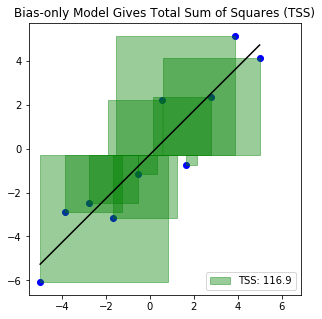

In [32]:
# offset parameter of LSS solution is the mean of targets
assert y.mean() == beta_0

def bias_only_model(x):
    return beta_0 * np.ones_like(x)

bias_only_loss = TSS = round(sum((y - bias_only_model(x))**2), 1)

# Plotting
BIAS_ONLY_MODEL_COLOR = 'green'

# Average Model Solution and TSS
plt.subplots(figsize=(5, 5))
plot_data_and_linear_model()

# Plot the loss contributions as squares
for data in zip(x, y, bias_only_model(x)):
    error_patch = plot_prediction_loss(
        *data,
        color=BIAS_ONLY_MODEL_COLOR,
        label=f"TSS: {TSS}"
    )
standardize_axis_dims()
plt.legend(handles=[error_patch])
plt.title("Bias-only Model Gives Total Sum of Squares (TSS)")

plt.savefig('/tmp/bias-only-model-gives-rss.png', bbox_inches='tight', dpi=300)

In [26]:
lss_loss = RSS = round(sum((y - linear_model_function(x))**2), 1)
bias_only_loss = TSS = round(sum((y - bias_only_model(x))**2), 1)
r_squared = 1 - RSS / TSS
r = np.sqrt(r_squared)
raw_cc = np.corrcoef(y, linear_model_function(x))[0][1]

print(r"0. R^2 derived from loss functions: {:1.3f}".format(r_squared))
print(f"1. Correlation derived from R^2: {r:1.3f}")
print(f"2. Raw correlation (numpy): {raw_cc:1.3f}")
print(f"3. Correlation returned by model fit: {correlation_coefficient:1.3f}")


0. R^2 derived from loss functions: 0.869
1. Correlation derived from R^2: 0.932
2. Raw correlation (numpy): 0.932
3. Correlation returned by model fit: 0.932


## Figure 4: Physical System Interpretation

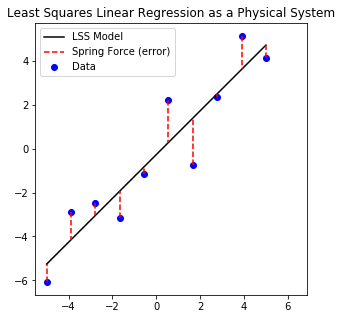

In [52]:
# Plot Error as physical system
plt.subplots(figsize=(5, 5))
plot_data_and_linear_model()

def plot_springs():
    for ii, (x_, y_, pred) in enumerate(zip(x, y, linear_model_function(x))):
        label = None if ii > 0 else "Spring Force (error)"
        plt.plot((x_, x_), (y_, pred), 'r--', label=label)
    plt.legend()
        
plot_springs()
plt.title('Least Squares Linear Regression as a Physical System')
plt.savefig('/tmp/ols-as-physical-system.png', bbox_inches='tight', dpi=300)